In [1]:
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

pd.options.display.max_colwidth = 100

In [67]:
df = pd.read_csv('data.csv')

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
df = df.fillna(99)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,43.465960,30.568608,0.42,22.0000,32.0000,54.0,99.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [74]:
df.Embarked.unique()

array(['S', 'C', 'Q', 99], dtype=object)

In [75]:
df['Sex'] = df.Sex.map({'male':1, 'female':2})
df['Embarked'] = df.Embarked.map({'C':1, 'Q':2, 'S':3, 99:9})

In [76]:
df.Embarked.unique()

array([3, 1, 2, 9], dtype=int64)

In [77]:
df['Cabin_L'] = df['Cabin'].astype(str).str[0]
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_L
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,99,3,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,38.0,1,0,PC 17599,71.2833,C85,1,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,99,3,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,99,3,9
5,6,0,3,"Moran, Mr. James",1,99.0,0,0,330877,8.4583,99,2,9
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,3,E
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,99,3,9
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,99,3,9
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,99,1,9


In [78]:
df.Cabin_L.unique()

array(['9', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [79]:
df['Cabin_L'] = df.Cabin_L.map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, '9':9})
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_L
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,99,3,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,99,3,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,99,3,9
5,6,0,3,"Moran, Mr. James",1,99.0,0,0,330877,8.4583,99,2,9
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,3,5
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,99,3,9
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,99,3,9
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,99,1,9


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null int64
Cabin_L        891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [83]:
df.Embarked.unique()

array([3, 1, 2, 9], dtype=int64)

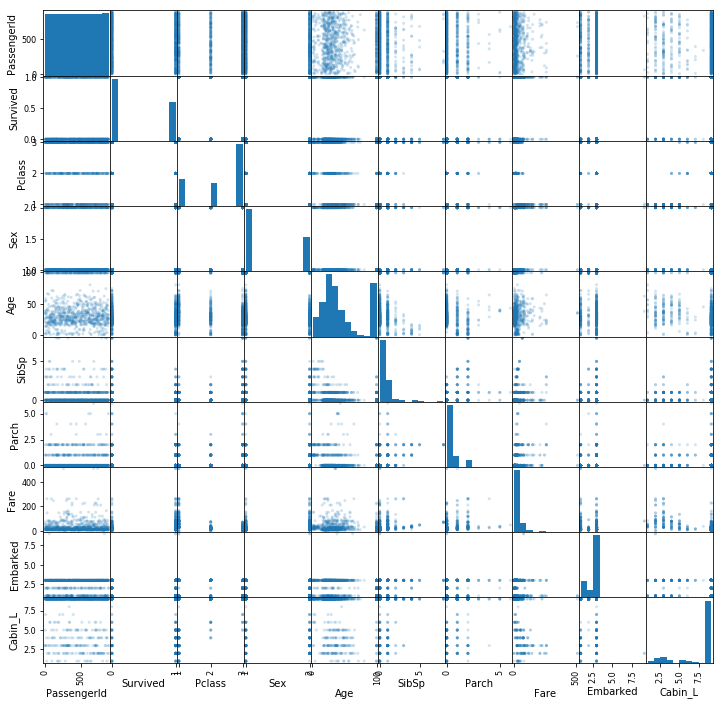

In [84]:
scatter_matrix(df, alpha=0.2, figsize =(12,12))
None

In [81]:
from itertools import combinations
rows = []
for i in range(1,9):
    combos = list(combinations(['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin_L', 'Embarked'],i))
    for j,com in enumerate(combos):
        y = df.Survived
        X = pd.DataFrame(df, columns=com)
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=22)
        model = LogisticRegression(fit_intercept=True)
        score = cross_val_score(model, X, y, cv=20, scoring='accuracy').mean()
        s = ', '.join(com)
        rows.append({'Score':score, 'Combos':s,})
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1.head()

,Combos,Score
0,Pclass,0.679453
1,Sex,0.786496
2,Age,0.616147
3,SibSp,0.616147
4,Parch,0.607156


In [82]:
df1.iloc[df1.Score.idxmax()]

Combos    Pclass, Sex, Age, Parch, Embarked
Score                              0.804801
Name: 168, dtype: object

In [85]:
y = df.Survived
X = pd.DataFrame(df, columns=['Pclass', 'Sex', 'Age', 'Parch', 'Embarked'])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [87]:
model = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

In [88]:
model.score(X_test, y_test) 

0.79661016949152541

In [89]:
cross_val_score(model, X, y, cv=20, scoring='accuracy')

array([ 0.69565217,  0.86956522,  0.77777778,  0.77777778,  0.8       ,
        0.8       ,  0.77777778,  0.86666667,  0.84444444,  0.77272727,
        0.79545455,  0.70454545,  0.81818182,  0.86363636,  0.84090909,
        0.81818182,  0.84090909,  0.81818182,  0.72727273,  0.88636364])

In [90]:
y_hat = model.predict(X_test)

In [91]:
confusion_matrix(y_test, y_hat)

array([[148,  27],
       [ 33,  87]], dtype=int64)

In [92]:
recall = 87/(87+33)
precision = 87/(87+27)

In [93]:
recall

0.725

In [94]:
precision

0.7631578947368421

In [99]:
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
model = LinearRegression(fit_intercept=True)
cross_val_score(model, X, y, cv=20, scoring='r2')

array([ 0.28660899,  0.38695415,  0.02744571,  0.22330864,  0.35202229,
        0.3183973 ,  0.22058658,  0.5152139 ,  0.4269109 ,  0.31089887,
        0.42062783,  0.41032367,  0.22799713,  0.52878289,  0.32953313,
        0.32364799,  0.46026791,  0.45804272,  0.21096577,  0.51529824])

In [100]:
cross_val_score(model, X, y, cv=10, scoring='r2').mean()

0.34807231728595672

In [101]:
model.fit(X,y).coef_

array([-0.15122351,  0.51797586, -0.00135754, -0.03163365, -0.04193267])

In [102]:
model.fit(X,y).intercept_

0.21044598408017504

In [103]:
b = 0.21044598408017504 # y intercept
Pclass_coef = -0.15122351
Sex_coef = 0.51797586
Age_coef = -0.00135754
Parch_coef = -0.03163365
Embarked_coef = -0.04193267

Pclass_input = user_str = input('Please input Ticket Class: ')
Sex_input = user_str = input('Please input Sex: ')
Age_input = user_str = input('Please input Age: ')
Parch_input = user_str = input('Please input Parents/Children: ')
Embarked_input = user_str = input('Please input where Embarked: ')

y_hat = b + (Pclass_coef*int(Pclass_input)) + (Sex_coef*int(Sex_input)) + (Age_coef*int(Age_input)) + (Parch_coef*int(Parch_input)) + (Embarked_coef*int(Embarked_input))

print(y_hat)

Please input Ticket Class: 1
Please input Sex: 1
Please input Age: 20
Please input Parents/Children: 0
Please input where Embarked: 2
0.4661821940801749
